In [53]:
import numpy as np
import math
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [54]:
class CPN:
    def __init__(self, num_centers=2, sigma=1.0):
        self.num_centers = num_centers
        self.sigma = sigma
        self.centers = None
        self.weights = None

    def __activation(self, X):
        m = X.shape[0]
        activations = np.zeros((m, self.num_centers))

        for i in range(m):
            for j in range(self.num_centers):
                distance = np.linalg.norm(X[i] - self.centers[j])
                activations[i][j] = np.exp(-distance**2 / (2 * self.sigma**2))

        return activations

    def fit(self, X, y):
        self.centers = X[np.random.choice(X.shape[0], self.num_centers, replace=False)]
        activations = self.__activation(X)
        self.weights = np.linalg.pinv(activations.T @ activations) @ activations.T @ y

    def predict(self, X):
        activations = self.__activation(X)
        return np.sign(activations @ self.weights)

In [55]:
data = pd.read_csv("../data/diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [58]:
X_train, X_test, y_train, y_test = train_test_split(data.drop("Outcome", axis=1), data['Outcome'], test_size=0.2, random_state=42)

In [95]:
cpn = CPN()
cpn.fit(X_train.to_numpy(), y_train.to_numpy())
cpn.weights

array([1.00000000e+00, 4.83053221e-50])

In [96]:
y_pred = cpn.predict(X_test.to_numpy())
y_pred

array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [97]:
accuracy = accuracy_score(y_test.to_numpy(), y_pred)
report = classification_report(y_test.to_numpy(), y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Accuracy: 0.5844155844155844
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.90      0.74        99
           1       0.09      0.02      0.03        55

    accuracy                           0.58       154
   macro avg       0.36      0.46      0.38       154
weighted avg       0.43      0.58      0.48       154



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


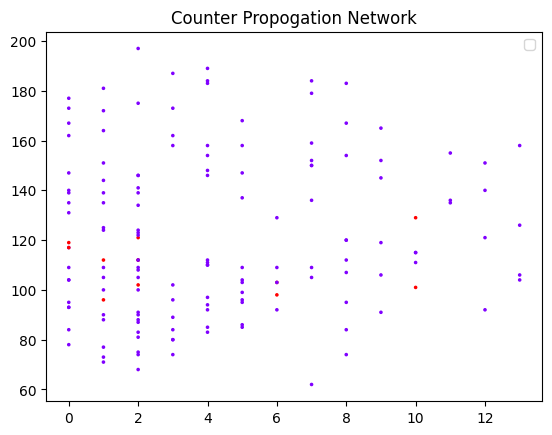

In [98]:
plt.scatter(X_test.to_numpy()[:, 0], X_test.to_numpy()[:, 1], c=y_pred, cmap='rainbow', s=10, marker='.')
plt.title('Counter Propogation Network')
plt.legend()
plt.show()